<a href="https://colab.research.google.com/github/SH-pourya/Solve-a-simple-attitude-control/blob/main/Test%20KNN%20for%20data%20of%20iranian%20number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this Example write with KNN method for classifier
goal of this example is determine of persian numbers from images

dateset used in this example: https://www.kaggle.com/datasets/sajjadsoroori/iranis

or: https://github.com/alitourani/Iranis-dataset


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.stats import mode

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

from PIL import Image
from PIL import ImageOps

from urllib.request import urlretrieve

In [2]:
data_url = "https://github.com/alitourani/Iranis-dataset/archive/refs/heads/master.zip"

In [3]:
urlretrieve(data_url, 'master.zip')

('master.zip', <http.client.HTTPMessage at 0x7f20a246dc90>)

In [4]:
!ls

master.zip  sample_data


rename zip file name to: *LsDIranianV*

The name of the file is abbreviated Large-scale Dataset of Iranian Vehicles License Plate Characters

In [5]:
!unzip master.zip

Archive:  master.zip
1e3c1df3bc01a8e2580fe3c80ecdac661be6881b
   creating: Iranis-dataset-master/
  inflating: Iranis-dataset-master/Iranis Dataset Files.zip  
  inflating: Iranis-dataset-master/LICENSE  
  inflating: Iranis-dataset-master/README.md  
  inflating: Iranis-dataset-master/_config.yml  
   creating: Iranis-dataset-master/_doc/
  inflating: Iranis-dataset-master/_doc/Iranis_License_Plates.png  


In [30]:
dire = "/content/Iranis-dataset-master"
file_name = os.listdir(dire)[3]
dinal_name = "/content/Iranis-dataset-master/LsDIranianV.zip"
os.rename(dire+'/'+file_name, dinal_name)

In [ ]:
!unzip  /content/Iranis-dataset-master/LsDIranianV.zip

Test Image:

(44, 19, 3)
RGB
(9, 14)
L
(9, 14)
L
(20, 40)


(40, 20)

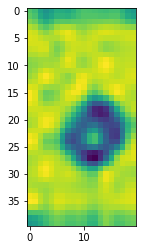

In [34]:
Im1 = plt.imread(str(2) + '/' + str(2) + ' ('+ str(1) + ')' + '.jpg')
plt.imshow(Im1) #showing an example
print(Im1.shape)
Im2 = Image.open(str(0) + '/' + str(0) + ' ('+ str(1) + ')' + '.jpg')
print(Im2.mode)
print(Im2.size)
Im2 = ImageOps.grayscale(Im2)
print(Im2.mode)
print(Im2.size)
plt.imshow(Im2) #showing an example
N_S = (20, 40)
Im2 = Im2.resize(N_S)
print(Im2.mode)
print(Im2.size)
plt.imshow(Im2) #showing an example
Im2 = np.array(Im2)
Im2.shape

In [35]:
Im_flat = np.zeros((38655, 40*20))
cnt = 0
target = np.zeros((38655))

0
2501
1
3495
2
3930
3
2745
4
5774
5
3610
6
5753
7
3736
8
3583
9
3528
38655


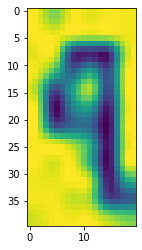

In [37]:
for i in range(10):
  ls = os.listdir(str(i))
  print(i)
  print(len(ls))
  for image_path in ls:
    Im3 = plt.imread(str(i) + '/' + image_path)
    plt.imshow(Im3)
    
    ##
    Im = Image.open(str(i) + '/' + image_path)
    New_Size = (20, 40)
    Im = ImageOps.grayscale(Im)
    Im = Im.resize(New_Size)
    #print(Im.size)
    Im = np.array(Im)
    Im.shape
    #print(Im.shape)
    ##
    Im_flat[cnt,:] = Im.reshape(-1) #flatten
    target[cnt] = i
    cnt += 1
    #print(cnt)
print(cnt)
plt.imshow(Im) #showing an example

In [38]:
X_train, X_test, y_train, y_test = train_test_split(Im_flat, target, test_size=0.22)

In [39]:
knn_image = KNeighborsClassifier(n_neighbors=5, algorithm='brute', p=2)

In [40]:
knn_image.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [41]:
y_pred3 = knn_image.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       567
         1.0       0.99      0.99      0.99       757
         2.0       0.96      0.96      0.96       854
         3.0       0.94      0.94      0.94       582
         4.0       0.99      0.99      0.99      1290
         5.0       0.99      0.99      0.99       771
         6.0       1.00      0.99      0.99      1238
         7.0       0.99      0.99      0.99       829
         8.0       1.00      1.00      1.00       792
         9.0       1.00      0.99      0.99       825

    accuracy                           0.99      8505
   macro avg       0.98      0.99      0.99      8505
weighted avg       0.99      0.99      0.99      8505



test KNN function: 

In [43]:
print(y_pred3)

[4. 3. 1. ... 7. 4. 0.]


In [44]:
#define KNN function
def KNN(X_train, y_train, x_test, K=1, order_P=1):
  dist = np.linalg.norm(X_train.values - x_test, ord=order_P, axis=1)
  sorted_arg_dist = np.argsort(dist)
  y_nn = y_train.values[sorted_arg_dist[:K]]
  return mode(y_nn)[0][0]

In [ ]:
#prediction phase
y_pred1 = np.zeros(len(X_test))
X_train1 = pd.DataFrame(X_train)
X_test1 = pd.DataFrame(X_test)
y_train1 = pd.Series(y_train) 
for i in range(len(X_test)):
  print(len(X_test)-i)
  y_pred1[i] = KNN(X_train1, y_train1, X_test1.values[i], K=5, order_P=2)

In [46]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       567
         1.0       0.99      0.99      0.99       757
         2.0       0.96      0.96      0.96       854
         3.0       0.94      0.94      0.94       582
         4.0       0.99      0.99      0.99      1290
         5.0       0.99      0.99      0.99       771
         6.0       1.00      0.99      0.99      1238
         7.0       0.99      0.99      0.99       829
         8.0       1.00      1.00      1.00       792
         9.0       1.00      0.99      0.99       825

    accuracy                           0.99      8505
   macro avg       0.98      0.99      0.99      8505
weighted avg       0.99      0.99      0.99      8505

